![Arabistat Logo](Arabistat_logo.png)

In [ ]:
# Classification Capstone

* ### Go to The following link
https://www.kaggle.com/c/tech-weekend-data-science-hackathon

* ### Make Your Own notebook and work on Kaggle Platform

* ### Make AI model to Predict **TARGET** :)



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score,max_error,mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score,classification_report,roc_auc_score,roc_curve,auc
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# !pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# !pip install catboost
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA

In [3]:
# from google.colab import drive
# # Navigate to the folder
# from google.colab import drive
# # Navigate to the folder
# import os
# drive.mount('/content/drive')
# folder_path ="/content/drive/My Drive/Colab Notebooks/"
# os.chdir(folder_path)

In [6]:
data=pd.read_csv(r"C:\Users\MY PC\Downloads\train.csv")
df=data.copy()
display(df.head())

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [10]:
df["age"]=df["age"].astype(int)
# df["sex"]=df["sex"].replace([0,1],["female","male"])
df["sex"]=df["sex"].astype(object)
df["fasting_blood_sugar"]=df["fasting_blood_sugar"].astype(object)
df["resting_electrocardiographic_results"]=df["resting_electrocardiographic_results"].astype(object)
df["exercise_induced_angina"]=df["exercise_induced_angina"].astype(object)
####
df["slope"]=df["slope"].astype(object)
df["number_of_major_vessels"]=df["number_of_major_vessels"].astype(object)
df["thal"]=df["thal"].astype(object)
# df["class"]=df["class"].astype(object)

In [12]:
x=df.drop("class",axis=1)
y=df["class"]
#we will divide the df to cat and num
num_x=x.select_dtypes(include=np.number)
cat_x=x.select_dtypes(exclude=np.number)
cat_columns=list(cat_x.columns)
num_columns=list(num_x.columns)
print(f' *Features: \n cat columns:{cat_columns} \n num columns:{num_columns} \n *label:{df["class"].name} ' )

 *Features: 
 cat columns:['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal'] 
 num columns:['ID', 'age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak'] 
 *label:class 


In [14]:
#one hot encoding for cat features(we dont one hote encode the cat label)
x_encoded=pd.get_dummies(x,drop_first=True)
# y_encoded=pd.get_dummies(y,drop_first=True)#NO Need as it is already 0s and 1s
#split 1st then scale as the test data is supposed to be unseen
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)
#scaling for both num,cat
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print(x_train.shape,"\n",x_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(480000, 19) 
 (120000, 19) 
 (480000,) 
 (120000,)


In [16]:
pd.DataFrame(x_train,columns=x_encoded.columns).head()

,ID,age,chest,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,sex_1,fasting_blood_sugar_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,exercise_induced_angina_1,slope_2,slope_3,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,thal_6,thal_7
0,1.161896,1.547530,0.872863,0.273464,0.133412,0.485069,-0.020140,-1.449225,-0.421261,-0.105976,0.990421,1.413240,1.126727,-0.290365,-0.523676,-0.374016,-0.28167,-0.247932,-0.791306
1,-0.086462,0.117314,-0.466014,-0.098509,0.532824,0.723440,-0.159324,0.690024,-0.421261,-0.105976,0.990421,-0.707594,-0.887526,-0.290365,1.909576,-0.374016,-0.28167,-0.247932,-0.791306
2,-1.457360,0.227330,-0.180164,-0.225160,-1.083474,-2.665392,-0.037471,0.690024,-0.421261,-0.105976,0.990421,-0.707594,-0.887526,-0.290365,-0.523676,-0.374016,-0.28167,-0.247932,-0.791306
3,1.620005,0.117314,-0.180164,0.356264,-1.186624,0.591455,-0.919103,0.690024,-0.421261,-0.105976,-1.009672,-0.707594,-0.887526,-0.290365,-0.523676,-0.374016,-0.28167,-0.247932,1.263734
4,1.430322,1.877580,0.872863,2.398420,-1.455748,0.991671,-0.508694,0.690024,-0.421261,-0.105976,0.990421,-0.707594,-0.887526,-0.290365,-0.523676,-0.374016,-0.28167,-0.247932,1.263734


In [18]:
from sklearn.decomposition import PCA
pca_19d=PCA(n_components=19)
pcs_train=pca_19d.fit_transform(x_train)
pcs_test=pca_19d.transform(x_test)

In [20]:
pcs_train.shape

(480000, 19)

In [22]:
cum_sum=np.cumsum(pca_19d.explained_variance_ratio_)
cum_sum

array([0.12296487, 0.18860182, 0.25188299, 0.31148953, 0.37042447,
       0.42830427, 0.48584558, 0.54156769, 0.59513001, 0.64780834,
       0.70037853, 0.75243926, 0.80426088, 0.85044147, 0.88660805,
       0.92075261, 0.95205461, 0.97891216, 1.        ])

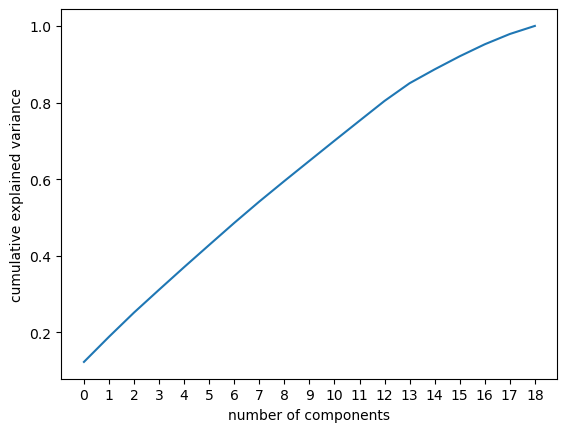

In [24]:
plt.plot(1,range(len(cum_sum)+1),cum_sum)
plt.xticks(range(len(cum_sum)+1))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [26]:
#new x after pca
x_train_19d=pd.DataFrame(pcs_train).iloc[:,0:13]
x_test_19d=pd.DataFrame(pcs_test).iloc[:,0:13]

In [28]:
def cv_score(model,x_train):
  """
  specify the name of x_train in the 2nd arg.
  """  
  strat_kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
  score=cross_val_score(model,x_train,y_train,cv=strat_kfold,scoring="accuracy")
  return score.mean()

In [30]:
help(cv_score)

Help on function cv_score in module __main__:

cv_score(model, x_train)
    specify the name of x_train in the 2nd arg.



In [32]:
def acc_score_train(model,x_train):
    """
    specify the name of x_train in the 2nd arg.
    """
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    return accuracy_score(y_train,y_train_pred)


In [34]:
def acc_score_test(model,x_train,x_test):
    """
    specify the name of x_train and x_test in the 2nd and 3rd argument
    """
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    return accuracy_score(y_test,y_test_pred)

In [36]:
lo=LogisticRegression()
acc_score_test(lo,x_train_19d,x_test_19d)

0.8720166666666667

In [38]:
# import time
# start =time.time()
# knn8=KNeighborsClassifier(n_neighbors=9)
# knn8.fit(x_train,y_train)
# y_test_pred=knn8.predict(x_test)
# print(accuracy_score(y_test,y_test_pred))
# end=time.time()
# print(end-start)
# #

0.882075
137.15048933029175


In [38]:
xgb=XGBClassifier()

In [40]:
cv_score(xgb,x_train)

0.9016145833333333

In [42]:
acc_score_train(xgb,x_train)

0.9089020833333333

In [44]:
xgb=XGBClassifier()
acc_score_test(xgb,x_train_19d,x_test_19d)

0.89345

In [42]:
# dt_clf=DecisionTreeClassifier()
# cv_score(dt_clf,x_train_19d)

0.8398729166666665

In [ ]:
# dt_clf=DecisionTreeClassifier()
# acc_score_test(dt_clf,x_train_19d,x_test_19d)

0.8404666666666667


In [ ]:
# from sklearn.ensemble import StackingClassifier
# def stack_model():
#     model0=[]
#     model0.append(("lo",LogisticRegression()))
#     model0.append(("knn9",KNeighborsClassifier(n_neighbors=9)))
#     model0.append(("xgb",XGBClassifier()))
#     model0.append(("dt",DecisionTreeClassifier()))
#     model1=LogisticRegression()
#     stack=StackingClassifier(estimators=model0,final_estimator=model1,cv=3)
#     return stack

In [ ]:
# model=stack_model()
# acc_score_test(model,x_train,x_test)

In [ ]:
# def models():
#     models=[]
#     models.append(("lo",LogisticRegression()))
#     models.append(("knn8",KNeighborsClassifier(n_neighbors=8)))
#     models.append(("xgb",XGBClassifier()))
#     models.append(("dt",DecisionTreeClassifier()))
#     models.append(("stack",stack_model()))
#     return models

In [ ]:
# models()

[('lo', LogisticRegression()),
 ('knn8', KNeighborsClassifier(n_neighbors=8)),
 ('xgb',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('dt', DecisionTreeClassifier()),
 ('stack',
  StackingClassifier(cv=10,
                     estimators=[('lo', LogisticRegressi

In [ ]:
names,results_cv,results_test=[],[],[]
for name,model in models():
   mean_scores=cv_score(model,x_train_19d)#manual function
   score_test=acc_score_test(model,x_train_19d,x_test_19d)#manual function
   names.append(name)
   results_cv.append(mean_scores)
   results_test.append(score_test)
   print(f'{model}:\n mean acc cv:{mean_scores} \n acc test:{score_test}')

LogisticRegression():
 mean acc cv:0.8732625 
 acc test:0.8720166666666667
KNeighborsClassifier(n_neighbors=8):
 mean acc cv:0.88103125 
 acc test:0.8808833333333334
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
 mean acc cv:0.8943229166666666 
 acc test:0.8936833333333334
DecisionTreeC

In [ ]:
# #LogisticRegression():
#  mean acc cv:0.8732625
#  acc test:0.8720166666666667
# KNeighborsClassifier(n_neighbors=8):
#  mean acc cv:0.88103125
#  acc test:0.8808833333333334
# XGBClassifier
#              
#  mean acc cv:0.8943229166666666
#  acc test:0.8936833333333334
# DecisionTreeClassifier():
#  mean acc cv:0.8390041666666667
#  acc test:0.8403

In [34]:
#the elbow is at col 13 in n_Comp =19

In [46]:
# this is for n_comp=19,we take diff n columns but the max var is for n comp =19
for i in range(2,20):
    #new x after pca
    x_train_19d_nc=pd.DataFrame(pcs_train).iloc[:,0:i]
    x_test_19d_nc=pd.DataFrame(pcs_test).iloc[:,0:i]
    print("pca 19d n_cols:",i)
    print(acc_score_test(xgb,x_train_19d_nc,x_test_19d_nc))

pca 19d n_cols: 2
0.8745583333333333
pca 19d n_cols: 3
0.8839333333333333
pca 19d n_cols: 4
0.8895833333333333
pca 19d n_cols: 5
0.89015
pca 19d n_cols: 6
0.88995
pca 19d n_cols: 7
0.8900583333333333
pca 19d n_cols: 8
0.8910666666666667
pca 19d n_cols: 9
0.8929333333333334
pca 19d n_cols: 10
0.8925333333333333
pca 19d n_cols: 11
0.892325
pca 19d n_cols: 12
0.8927416666666667
pca 19d n_cols: 13
0.89345
pca 19d n_cols: 14
0.893775
pca 19d n_cols: 15
0.8967083333333333
pca 19d n_cols: 16
0.8981416666666666
pca 19d n_cols: 17
0.8982916666666667
pca 19d n_cols: 18
0.8986416666666667
pca 19d n_cols: 19
0.8982916666666667


In [47]:
#pca_9 or 13

In [46]:
# this is for n_comp=19,we take diff n columns but the max var is for n comp =19
for i in[5,9,12,13]:
    #new x after pca
    x_train_19d_nc=pd.DataFrame(pcs_train).iloc[:,0:i]
    x_test_19d_nc=pd.DataFrame(pcs_test).iloc[:,0:i]
    print("pca 19d n_cols:",i)
    print(acc_score_test(xgb,x_train_19d_nc,x_test_19d_nc))
    

pca 19d n_cols: 5
0.89015
pca 19d n_cols: 9
0.8929333333333334
pca 19d n_cols: 12
0.8927416666666667
pca 19d n_cols: 13
0.89345


In [54]:
#here we change the n_comp not just take set num of columns from pca_19d(n_components=19)
acc_pca_nd=[]
for i in range(2,20):
    pca_nd=PCA(n_components=i)
    pcs_train_new=pca_nd.fit_transform(x_train)
    pcs_test_new=pca_nd.transform(x_test)
    xgb=XGBClassifier()
    x_train_new=pd.DataFrame(pcs_train_new)#we may add .iloc here later
    x_test_new=pd.DataFrame(pcs_test_new)#we may add .iloc here later
    acc=acc_score_test(xgb,x_train_new,x_test_new)
    acc_pca_nd.append(acc)
    print("pca:",i,"d")
    print(acc)

pca: 2 d
0.8733333333333333
pca: 3 d
0.883025
pca: 4 d
0.8865166666666666
pca: 5 d
0.8906583333333333
pca: 6 d
0.8903333333333333
pca: 7 d
0.89035
pca: 8 d
0.8908416666666666
pca: 9 d
0.8929333333333334
pca: 10 d
0.8925333333333333
pca: 11 d
0.892325
pca: 12 d
0.8927416666666667
pca: 13 d
0.89345
pca: 14 d
0.893775
pca: 15 d
0.8967083333333333
pca: 16 d
0.8981416666666666
pca: 17 d
0.8982916666666667
pca: 18 d
0.8986416666666667
pca: 19 d
0.8982916666666667


`here we have diff pca s w diff comp/dim that in each one of them we can take set n_cols to reduce the complexety and potential overfitting`

In [52]:
# judge by explained variance cum_sum or actual results???

In [ ]:
#pca_5d
#htn on xgb
#try Random_Forest,SVC
#and start from lo as baseline

In [ ]:
pca_5d=PCA(n_components=5)
pcs_train_5d=pca_5d.fit_transform(x_train)
pcs_test_5d=pca_5d.transform(x_test)
x_train_5d=pd.DataFrame(pcs_train_5d)#we may add .iloc here later
x_test_5d=pd.DataFrame(pcs_test_5d)#we may add .iloc here later